In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')

#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import psycopg2

In [2]:
import dvfdata
df=dvfdata.loadDVF_Maisons(departement='77',refresh_force=False,add_commune=False)

#df=load_dvf(departement='77')

Read Mutations
Read Local
Read Parcelle
Read Adresse
Make the join for DVF
Filter data:
Final Calculations


In [3]:
df.shape

(48053, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48053 entries, 1468387 to 1516439
Data columns (total 11 columns):
valeurfonc      48053 non-null int64
sterr           48053 non-null int64
geolong         47821 non-null float64
geolat          47821 non-null float64
nbpprinc        48053 non-null float64
sbati           48053 non-null float64
quartier        48053 non-null object
commune         48053 non-null object
departement     48053 non-null object
communelabel    48053 non-null object
codepostal      48053 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 4.4+ MB


In [5]:
df.head(10)

,valeurfonc,sterr,geolong,geolat,nbpprinc,sbati,quartier,commune,departement,communelabel,codepostal
1468387,230000,529,NaN,NaN,4.0,40.0,77352000AL,77352,77,OZOUER-LE-VOULGIS,77390
1468388,240000,5787,2.561704,48.604120,6.0,103.0,77445000AD,77445,77,SAVIGNY-LE-TEMPLE,77176
1468389,254000,3250,2.526712,48.529765,5.0,89.0,77407000BD,77407,77,SAINT-FARGEAU-PONTHIERRY,77310
1468390,180000,444,NaN,NaN,4.0,90.0,77407000AV,77407,77,SAINT-FARGEAU-PONTHIERRY,77310
1468391,140000,1132,NaN,NaN,5.0,67.0,77305000AT,77305,77,MONTEREAU FAULT YONNE,77130
1468392,195000,5504,2.564060,48.603237,5.0,80.0,77445000AD,77445,77,SAVIGNY-LE-TEMPLE,77176
1468393,220000,511,NaN,NaN,4.0,66.0,77243000AY,77243,77,LAGNY-SUR-MARNE,77400
1468394,250000,1633,NaN,NaN,8.0,171.0,77131000AP,77131,77,COULOMMIERS,77120
1468395,193000,5609,2.564346,48.604020,5.0,80.0,77445000AD,77445,77,SAVIGNY-LE-TEMPLE,77176
1468396,380000,1747,NaN,NaN,4.0,64.0,77083000BE,77083,77,CHAMPS-SUR-MARNE,77420


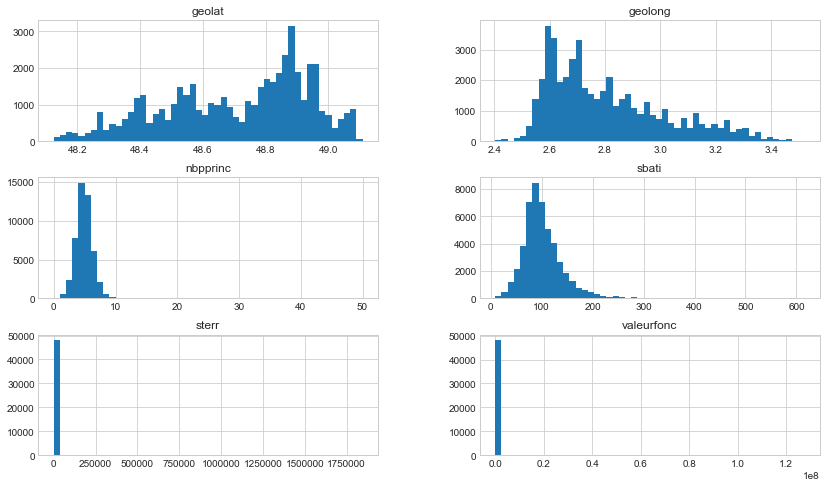

In [8]:
df.hist(bins=50,figsize=(14,8));

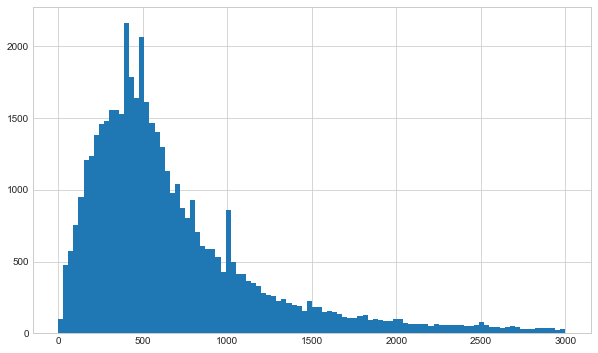

In [14]:
df[df["sterr"]<=3000]["sterr"].hist(bins=100,figsize=(10,6));

In [10]:
print("longitude:")
print(df["geolong"].min())
print(df["geolong"].max())
print("latitude:")
print(df["geolat"].min())
print(df["geolat"].max())

longitude:
2.40371935055247
3.51839474855333
latitude:
48.1253501620493
49.1086434003195


In [13]:
min_long=2.4
max_long=3.52
min_lat=48.12
max_lat=49.12
graphsize=10
img = plt.imread("maps_fonds/map_77.png")
extent = (min_long, max_long, min_lat, max_lat) # Use the boundaries for map background

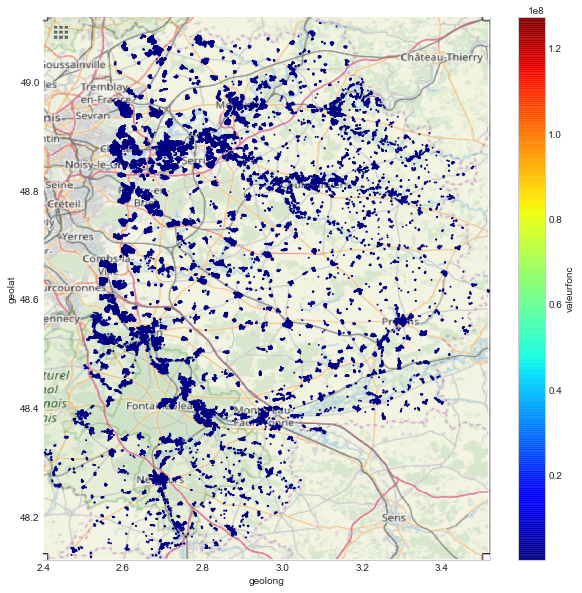

In [14]:
fig, ax = plt.subplots(figsize=(graphsize,graphsize))
ax.set_xlim(min_long, max_long) # Define bundaries of axes in lat/long
ax.set_ylim(min_lat, max_lat)
im = ax.imshow(img, aspect='auto',extent=extent,zorder=5)
ax2=df.plot.scatter(x="geolong",y="geolat",alpha=0.9,c="valeurfonc"
        ,s=1,cmap=plt.get_cmap("jet"),colorbar=True,norm=mpl.colors.Normalize()
        ,zorder=10
        ,ax=ax)
plt.show()

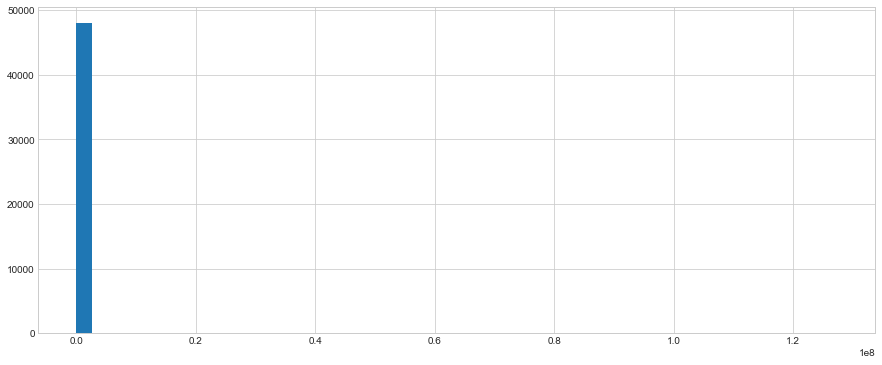

In [15]:
df["valeurfonc"].hist(bins=50,figsize=(15,6));

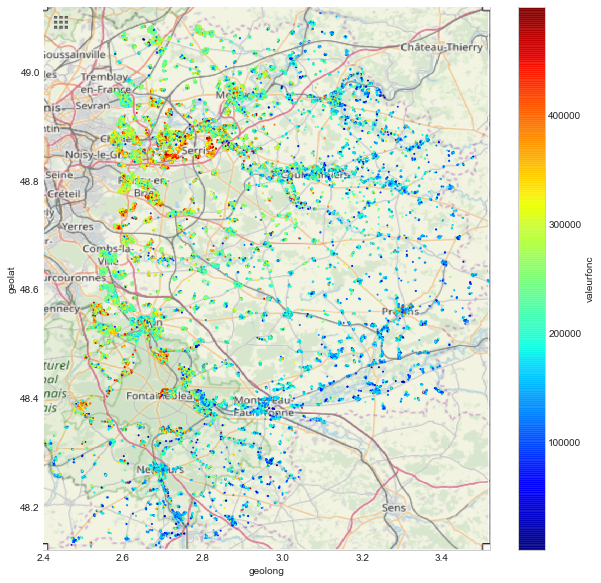

In [16]:
ventes_filtrees=df[df["valeurfonc"] < 500000]

fig, ax = plt.subplots(figsize=(graphsize,graphsize))
ax.set_xlim(min_long, max_long) # Define bundaries of axes in lat/long
ax.set_ylim(min_lat, max_lat)
im = ax.imshow(img, aspect='auto',extent=extent,zorder=5)
ax2=ventes_filtrees.plot.scatter(x="geolong",y="geolat",alpha=0.9,c="valeurfonc"
        ,s=1,cmap=plt.get_cmap("jet"),colorbar=True,norm=mpl.colors.Normalize()
        ,zorder=10
        ,ax=ax)
plt.show()